In [10]:
from quick_analyzer import analyzer 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
sns.set() 

In [2]:
dict_ana={}

# Silicon

In [3]:
mat="si"

In [4]:

dict_ana[mat]= analyzer(mat,f"./{mat}_qmc_dens_vxc.csv") 


In [31]:
dict_ana[mat].add_to_dict_from_npz(f"./{mat}_2ndorder_con5_sc1.npz", "con_2nd_order")

for ./si_2ndorder_con5_sc1.npz number of iterations is  32
diff on density for the last iteration: 1.46e-11
The direct gap is 1.9812 ev | QMC = 2.72 eV


In [32]:
dict_ana[mat].add_to_dict_from_npz(f"./{mat}_2ndorder_lin5_sc1.npz", "lin_2nd_order")

for ./si_2ndorder_lin5_sc1.npz number of iterations is  269
diff on density for the last iteration: 7.07e-15
The direct gap is 2.2425 ev | QMC = 2.72 eV


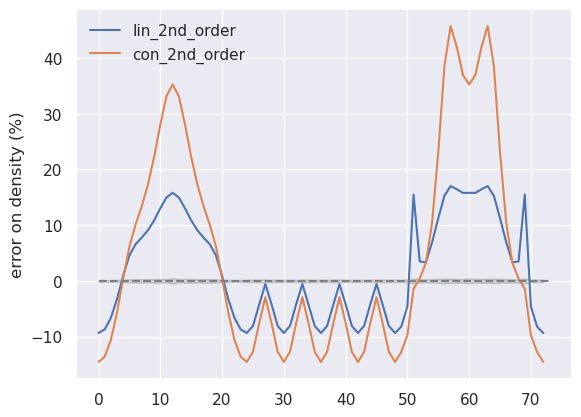

In [33]:
dict_ana[mat].plot_diff_with_qmc(["lin_2nd_order","con_2nd_order"])

In [34]:
dict_ana[mat].get_stat()
dict_ana[mat].direct_gaps_data

,Direct KS Gap (ev),Relative error (%)
con_2nd_order,1.981238,27.160370
lin_2nd_order,2.242511,17.554759


In [35]:
dict_ana[mat].dens_vxc_error_data

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%)
con_2nd_order,12.493029,45.758445,38.361148,67.249810
lin_2nd_order,6.207644,17.134433,12.704771,271.938788


(-0.6, 0.01)

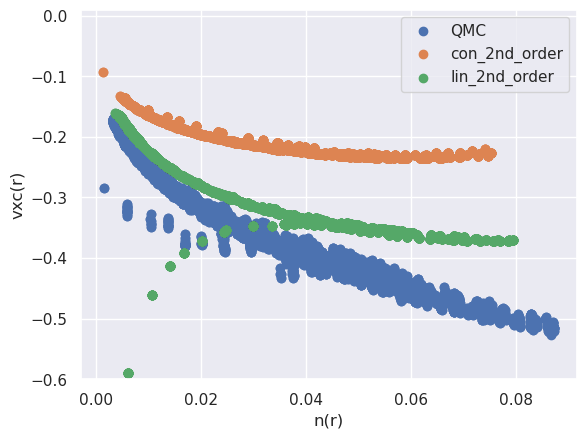

In [44]:
mat="si"
plt.scatter(dict_ana[mat].newdens_QMC, dict_ana[mat].vxc_qmc, label="QMC")
for l in dict_ana[mat].dict.keys():
    plt.scatter(dict_ana[mat].dict[l]["dens"].real, dict_ana[mat].dict[l]["vxc"].real, label=l)

plt.xlabel("n(r)")
plt.ylabel("vxc(r)")

plt.legend()
plt.ylim(-0.6, 0.01)


In [5]:
from connector_2nd import connector 
from utils import * 
from input_mat import input_dict        
from  scipy.misc import derivative


In [25]:
si_sys=system(input_dict)
xc_func = connector(si_sys)

/scratch/connector/con_2nd/ipykernel_1595649/14152061.py:5: DeprecationWarning:

scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools

/scratch/connector/con_2nd/ipykernel_1595649/14152061.py:6: DeprecationWarning:

scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools



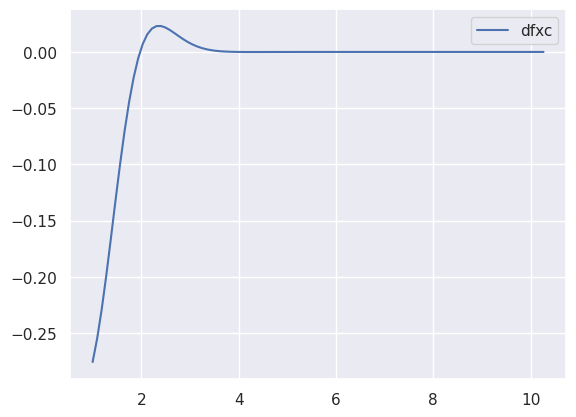

In [37]:
r=np.linspace(1,si_sys.a_l[0],100)

def get_dfxc(nbar):
    rs = (4*np.pi/3*nbar)**(-1/3) 
    d_fxcr_smooth_pz = derivative(lambda x:  connector.fxcr_smooth_pz(x,r), rs, dx=1e-6)
    d_fxcr_residual_pz = derivative(lambda x:  connector.fxcr_residual_pz(x,r), rs, dx=1e-6)
    return  (d_fxcr_smooth_pz + d_fxcr_residual_pz) 
plt.plot(r,get_dfxc(nbar=0.05), label="dfxc")
plt.legend()

In [35]:
# def get_rs(nbar):
#     rs = (4*np.pi/3*nbar)**(-1/3) 
#     return rs 
# r=np.linspace(1,si_sys.a_l[0],100)

# rs=get_rs(1)
# d_fxcr_smooth_pz = derivative(lambda x:  connector.fxcr_smooth_pz(x,r), rs, dx=1e-6)
# d_fxcr_residual_pz = derivative(lambda x:  connector.fxcr_residual_pz(x,r), rs, dx=1e-6)

In [36]:
# plt.plot(r,d_fxcr_smooth_pz+d_fxcr_residual_pz, label="dfxc")
# plt.legend()

# NaCl

In [63]:
mat="nacl"

In [64]:

dict_ana[mat]= analyzer(mat,f"./{mat}_qmc_dens_vxc.csv") 


In [47]:
dict_ana[mat].add_to_dict_from_npz(f"./{mat}_2ndorder_con5_sc1.npz", "con_2nd_order")

for ./nacl_2ndorder_con5_sc1.npz number of iterations is  74
diff on density for the last iteration: 5.02e-14
The direct gap is 2.6993 ev | QMC = 5.25 eV


In [48]:
dict_ana[mat].add_to_dict_from_npz(f"./{mat}_2ndorder_lin5_sc1.npz", "lin_2nd_order")

for ./nacl_2ndorder_lin5_sc1.npz number of iterations is  104
diff on density for the last iteration: 7.92e-10
The direct gap is 3.2901 ev | QMC = 5.25 eV


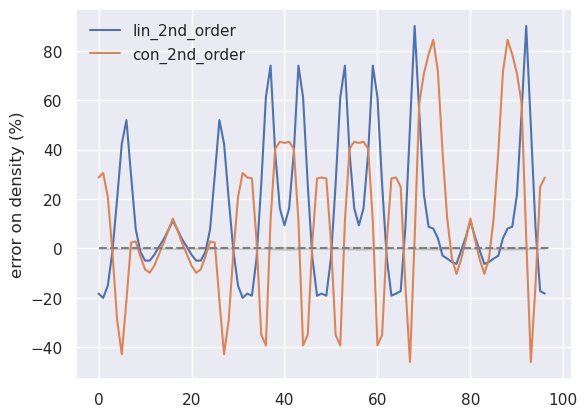

In [49]:
dict_ana[mat].plot_diff_with_qmc(["lin_2nd_order","con_2nd_order"])

In [50]:
dict_ana[mat].get_stat()
dict_ana[mat].direct_gaps_data

,Direct KS Gap (ev),Relative error (%)
con_2nd_order,2.699262,48.58548
lin_2nd_order,3.290119,37.33107


In [51]:
dict_ana[mat].dens_vxc_error_data

,density MeanARE(%),density MaxARE(%),vxc MeanARE(%),vxc MaxARE(%)
con_2nd_order,23.497905,84.428179,36.999058,441.08044
lin_2nd_order,19.661921,91.322200,45.302405,181.00986


(-1.5, 0.25)

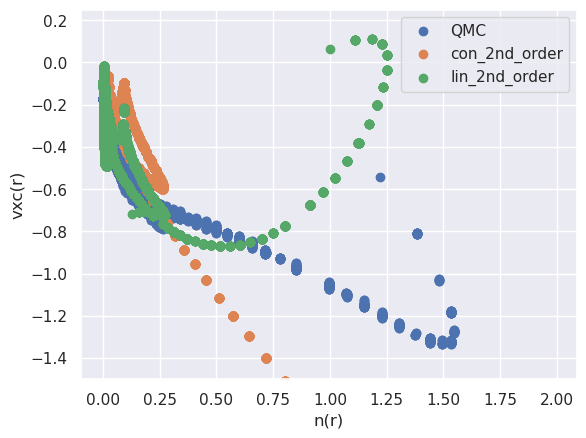

In [56]:
mat="nacl"
plt.scatter(dict_ana[mat].newdens_QMC, dict_ana[mat].vxc_qmc, label="QMC")
for l in dict_ana[mat].dict.keys():
    plt.scatter(dict_ana[mat].dict[l]["dens"].real, dict_ana[mat].dict[l]["vxc"].real, label=l)

plt.xlabel("n(r)")
plt.ylabel("vxc(r)")

plt.legend()
plt.ylim(-1.5, 0.25)

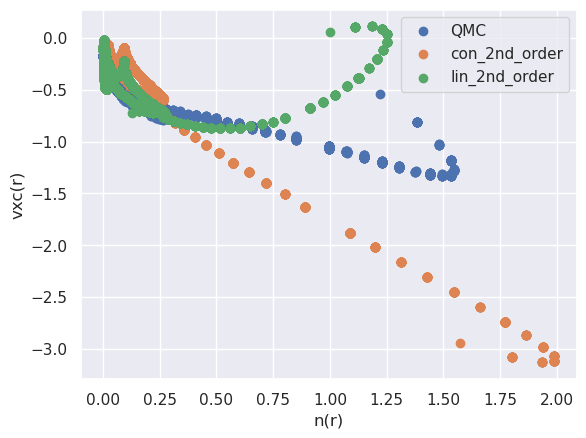

In [57]:
mat="nacl"
plt.scatter(dict_ana[mat].newdens_QMC, dict_ana[mat].vxc_qmc, label="QMC")
for l in dict_ana[mat].dict.keys():
    plt.scatter(dict_ana[mat].dict[l]["dens"].real, dict_ana[mat].dict[l]["vxc"].real, label=l)

plt.xlabel("n(r)")
plt.ylabel("vxc(r)")

plt.legend()


# Exchange-Correlation Kernel 

In [ ]:
r=np.linspace(1,si_sys.a_l[0],100)
def get_dfxc(nbar,ir):
    rs = (4*np.pi/3*nbar)**(-1/3) 
    d_fxcr_smooth_pz = derivative(lambda x:  connector.fxcr_smooth_pz(x,ir), rs, dx=1e-6)
    d_fxcr_residual_pz = derivative(lambda x:  connector.fxcr_residual_pz(x,ir), rs, dx=1e-6)
    return  (d_fxcr_smooth_pz + d_fxcr_residual_pz) 

def get_FXC(nbar,ir):
    rs = (4*np.pi/3*nbar)**(-1/3) 
    fxcr_smooth_pz = connector.fxcr_smooth_pz(rs,ir)
    fxcr_residual_pz = connector.fxcr_residual_pz(rs,ir)
    return  (fxcr_smooth_pz + fxcr_residual_pz) 

data=[]
dens_si=dict_ana["si"].newdens_QMC 
dens_nacl=dict_ana["nacl"].newdens_QMC
print(dens_si.min(), dens_si.max(), dens_nacl.min(), dens_nacl.max())
for dens in np.linspace(dens_si.min(), dens_nacl.max(),100): 
    for ir in r: 
        dens=np.round(dens,3)
        FXC=get_FXC(dens,ir)
        dfxc= get_dfxc(dens,ir) 
        data.append([dens,ir,FXC,dfxc])

In [106]:
#df = pd.DataFrame( np.array(data), columns=["dens","r", "fxc","dfxc"])
#df.to_csv("fxc_dfxc.csv")

In [105]:
import plotly.express as px


fig= px.line(df, x="r", y=["fxc","dfxc"], animation_frame="dens", height=600) 

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()